In [ ]:
seq.ridge.regression <- function(X, y) {
    A = eye()
}

   user  system elapsed 
  6.289   0.000   6.306 


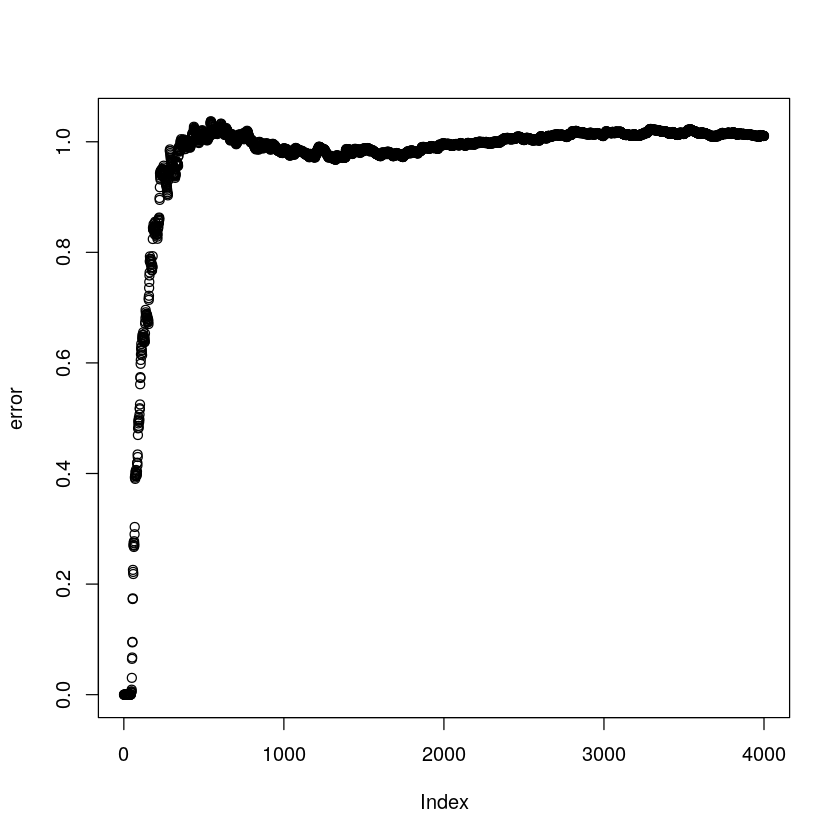

In [49]:
n <- 4000
d <- 50
X <- rbind(matrix(rnorm(n * (d - 1)), nrow = d - 1), matrix(1, ncol = n, nrow = 1))
y <- matrix(rnorm(n), nrow = 1)

start <- proc.time()
lambda <- 10
A <- diag(d) * lambda
b <- 0
error <- rep(NA, n)
for (k in 1:n) {
    x <- subset(X, select = k, drop = F)
    z <- A %*% x
    A <- (k + 1)/k * (A - z %*% (t(z) / (k + sum(x * z))))
    b <- k/(k + 1) * b + y[1, k]/(k + 1) * x
    w <- A %*% b
    error[k] = mean((t(w) %*% subset(X, select = 1:k, drop = F) - subset(y, select = 1:k, drop = F))^2)
}
print(proc.time() - start)
plot(error)

   user  system elapsed 
 36.946   0.252  37.208 


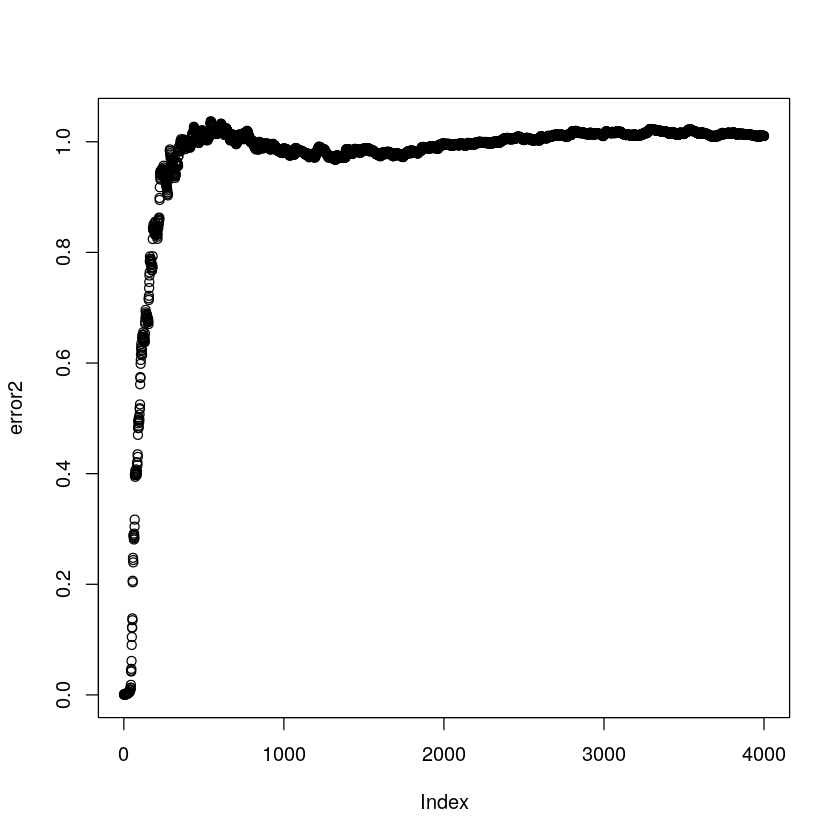

In [50]:
start <- proc.time()
error2 = rep(NA, n)
for (k in 1:n) {
    subX = subset(X, select = 1:k, drop = F)
    suby = subset(y, select = 1:k, drop = F)
    w <- suby %*% t(subX) %*% solve(subX %*% t(subX) + diag(d))
    error2[k] = mean(((w) %*% subset(X, select = 1:k, drop = F) - subset(y, select = 1:k, drop = F))^2)
}
print(proc.time() - start)
plot(error2)